In [1]:
import pickle
from negbin_weather import *
from src.inference import *
from src.criticism import *
from src.preprocess_bikeshare import *

In [2]:
with open('data/final_train_small.pickle', 'rb') as f:
    data_samp = pickle.load(f)

data, features = feature_generation(data_samp)
p = NegBinReg(features, data)

{'station': {'names': array(['station_2', 'station_3', 'station_4', 'station_5', 'station_6',
         'station_7', 'station_8', 'station_9', 'station_10', 'station_11',
         'station_12', 'station_13', 'station_14', 'station_16',
         'station_21', 'station_22', 'station_23', 'station_24',
         'station_25', 'station_26', 'station_27', 'station_28',
         'station_29', 'station_30', 'station_31', 'station_32',
         'station_33', 'station_34', 'station_35', 'station_36',
         'station_37', 'station_38', 'station_39', 'station_41',
         'station_42', 'station_45', 'station_46', 'station_47',
         'station_48', 'station_49', 'station_50', 'station_51',
         'station_54', 'station_55', 'station_56', 'station_57',
         'station_58', 'station_59', 'station_60', 'station_61',
         'station_62', 'station_63', 'station_64', 'station_65',
         'station_66', 'station_67', 'station_68', 'station_69',
         'station_70', 'station_71', 'station_72',

In [4]:
svi, elbo_loss = run_svi(p.model, p.guide,
                         iters=5000,
                         data=data['data'],
                         demand=data['demand'],
                         filename='models/negbin_weather_params.pkl')

/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin_weather.py:154: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  total_count_loc = pyro.param('total_count_loc', torch.tensor(5.),
/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin_weather.py:207: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  torch.tensor(0.5)))
/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columb

In [5]:
svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                  svi=svi)

In [6]:
print(svi.information_criterion())

OrderedDict([('waic', tensor(6810.2461, grad_fn=<SumBackward0>)), ('p_waic', tensor(206.4073, grad_fn=<SumBackward0>))])


In [8]:
    post_samples_prec = ppd_samples(
        p.wrapped_model,
        svi_posterior,
        data,
        ['obs'],
        num_samples=1000)

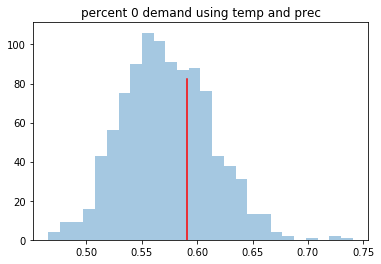

In [14]:

compare_test_statistic(data_samp.demand.values, post_samples_prec[:,0,:],
                       stat=perc_0,title='percent 0 demand using temp and prec')


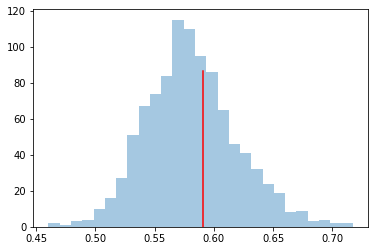

In [7]:
    compare_test_statistic(data_samp.demand.values, post_samples[:,0,:],
                           stat=perc_0)

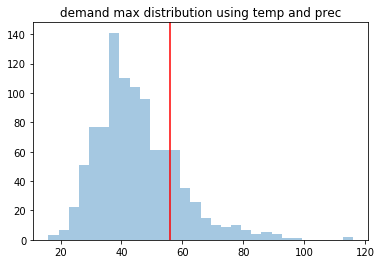

In [16]:

compare_test_statistic(data_samp.demand.values, post_samples_prec[:,0,:],
                       stat=max_,title='demand max distribution using temp and prec')

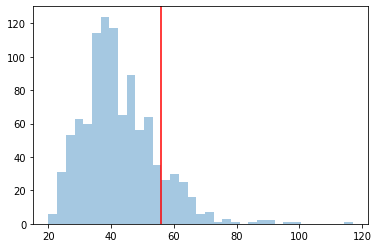

In [8]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                           stat=max_)

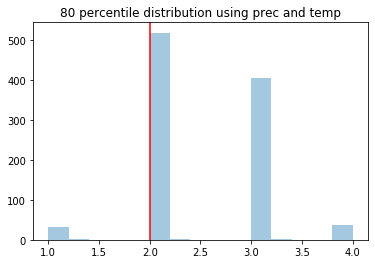

In [18]:
compare_test_statistic(data_samp.demand.values, post_samples_prec[:,0,:],
                       stat=percentile,q=80,title='80 percentile distribution using prec and temp')

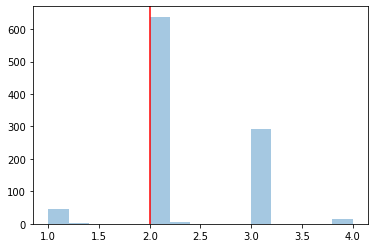

In [9]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                           stat=percentile, q=80)